In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Has a max error of 0.8
df = pd.read_csv('tuning_data.csv')

# Data frame small, with a max error of 0.2
dfs = df.loc[df.error <= 0.2]

# Data frame very small, with a max error of 0.1
dfvs = df.loc[df.error <= 0.1]

# Data frame extremely small, with a max error of 0.1
dfes = df.loc[df.error <= 0.05]

In [3]:
df.head()

,a,b,fraction,n,eqtemp,inv_fraction,inv_eqtemp,error,inv_error
0,1,1,1.0,0,1.000000,2.0,2.000000,0.000000,0.000000
1,1,1,1.0,1,1.059463,2.0,1.887749,0.056126,0.059463
2,1,1,1.0,2,1.122462,2.0,1.781797,0.109101,0.122462
3,1,1,1.0,3,1.189207,2.0,1.681793,0.159104,0.189207
4,1,1,1.0,4,1.259921,2.0,1.587401,0.206299,0.259921


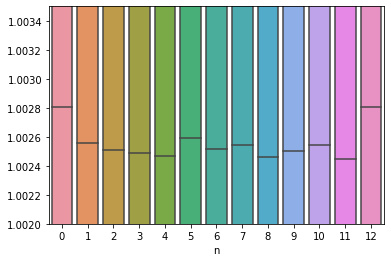

In [4]:
plt.ylim(1.002, 1.0035)
sns.boxplot(x=dfes.n, y=dfes.inv_error / dfes.error)

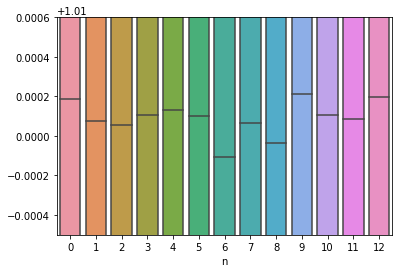

In [5]:
plt.ylim(1.0095, 1.0106)
sns.boxplot(x=dfvs.n, y=dfvs.inv_error / dfvs.error)

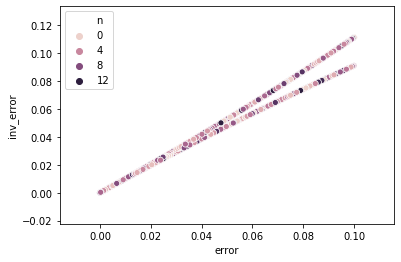

In [6]:
sns.scatterplot(dfvs.error[:1000], dfvs.inv_error[:1000], hue=dfvs.n[:1000])

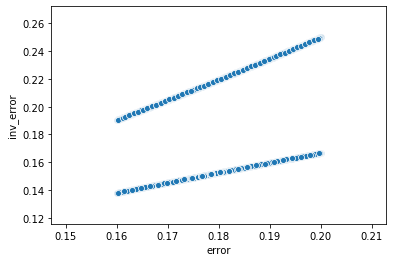

In [7]:
ercond = 0.16 <= dfs.error
sns.scatterplot(dfs.loc[ercond].error, dfs.loc[ercond].inv_error)

In [8]:
# Create data frame small, for testing the fork in errors
# don't touch
dfsert = dfs.loc[ercond]
# don't touch

In [9]:
errsep = 0.18
def sep_errors(row):
    # 1 means in the upper fork
    if row.inv_error > errsep:
        return 1
    # 0 means in the lower fork 
    else:
        return 0


In [10]:
dfsert['fork'] = dfsert.apply(sep_errors, axis='columns')

/Users/jessemurray/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
dfsert.head()

,a,b,fraction,n,eqtemp,inv_fraction,inv_eqtemp,error,inv_error,fork
47,2,1,2.000000,9,1.681793,1.000000,1.189207,0.189207,0.159104,0
94,3,2,1.500000,4,1.259921,1.333333,1.587401,0.190551,0.160053,0
174,4,3,1.333333,2,1.122462,1.500000,1.781797,0.187865,0.158153,0
180,4,3,1.333333,8,1.587401,1.500000,1.259921,0.160053,0.190551,1
185,4,5,0.800000,0,1.000000,2.500000,2.000000,0.200000,0.250000,1


In [12]:
dfsert.corr()

,a,b,fraction,n,eqtemp,inv_fraction,inv_eqtemp,error,inv_error,fork
a,1.000000,0.785411,0.000527,-0.000013,0.000001,-0.000367,0.000030,-0.000349,-0.000859,-0.000646
b,0.785411,1.000000,-0.556506,-0.456270,-0.450032,0.583300,0.458329,0.024422,0.328594,0.352282
fraction,0.000527,-0.556506,1.000000,0.759727,0.763270,-0.954235,-0.749407,-0.027723,-0.581132,-0.630148
n,-0.000013,-0.456270,0.759727,1.000000,0.995386,-0.781855,-0.995508,0.001152,0.000140,-0.000481
eqtemp,0.000001,-0.450032,0.763270,0.995386,1.000000,-0.771194,-0.981899,0.001261,0.000148,-0.000525
inv_fraction,-0.000367,0.583300,-0.954235,-0.781855,-0.771194,1.000000,0.785349,0.042882,0.564335,0.604410
inv_eqtemp,0.000030,0.458329,-0.749407,-0.995508,-0.981899,0.785349,1.000000,-0.001013,-0.000131,0.000420
error,-0.000349,0.024422,-0.027723,0.001152,0.001261,0.042882,-0.001013,1.000000,0.426650,0.021343
inv_error,-0.000859,0.328594,-0.581132,0.000140,0.000148,0.564335,-0.000131,0.426650,1.000000,0.905496
fork,-0.000646,0.352282,-0.630148,-0.000481,-0.000525,0.604410,0.000420,0.021343,0.905496,1.000000


In [16]:
dfsert.head()

,a,b,fraction,n,eqtemp,inv_fraction,inv_eqtemp,error,inv_error,fork
47,2,1,2.000000,9,1.681793,1.000000,1.189207,0.189207,0.159104,0
94,3,2,1.500000,4,1.259921,1.333333,1.587401,0.190551,0.160053,0
174,4,3,1.333333,2,1.122462,1.500000,1.781797,0.187865,0.158153,0
180,4,3,1.333333,8,1.587401,1.500000,1.259921,0.160053,0.190551,1
185,4,5,0.800000,0,1.000000,2.500000,2.000000,0.200000,0.250000,1


In [95]:
dfsert['pos'] = something

,a,b,fraction,n,eqtemp,inv_fraction,inv_eqtemp,error,inv_error
47,2,1,2.000000,9,1.681793,1.000000,1.189207,0.189207,0.159104
94,3,2,1.500000,4,1.259921,1.333333,1.587401,0.190551,0.160053
174,4,3,1.333333,2,1.122462,1.500000,1.781797,0.187865,0.158153
180,4,3,1.333333,8,1.587401,1.500000,1.259921,0.160053,0.190551
185,4,5,0.800000,0,1.000000,2.500000,2.000000,0.200000,0.250000
...,...,...,...,...,...,...,...,...,...
7977554,799,994,0.803823,0,1.000000,2.488110,2.000000,0.196177,0.244055
7977567,799,995,0.803015,0,1.000000,2.490613,2.000000,0.196985,0.245307
7977580,799,996,0.802209,0,1.000000,2.493116,2.000000,0.197791,0.246558
7977593,799,997,0.801404,0,1.000000,2.495620,2.000000,0.198596,0.247810


In [92]:

dfs.loc[ercond]

,a,b,fraction,n,eqtemp,inv_fraction,inv_eqtemp,error,inv_error
47,2,1,2.000000,9,1.681793,1.000000,1.189207,0.189207,0.159104
94,3,2,1.500000,4,1.259921,1.333333,1.587401,0.190551,0.160053
174,4,3,1.333333,2,1.122462,1.500000,1.781797,0.187865,0.158153
180,4,3,1.333333,8,1.587401,1.500000,1.259921,0.160053,0.190551
185,4,5,0.800000,0,1.000000,2.500000,2.000000,0.200000,0.250000
...,...,...,...,...,...,...,...,...,...
7977554,799,994,0.803823,0,1.000000,2.488110,2.000000,0.196177,0.244055
7977567,799,995,0.803015,0,1.000000,2.490613,2.000000,0.196985,0.245307
7977580,799,996,0.802209,0,1.000000,2.493116,2.000000,0.197791,0.246558
7977593,799,997,0.801404,0,1.000000,2.495620,2.000000,0.198596,0.247810


In [82]:
dfs.loc[dfs.error <= 0.2]

,a,b,fraction,n,eqtemp,inv_fraction,inv_eqtemp,error,inv_error
0,1,1,1.000000,0,1.000000,2.000000,2.000000,0.000000,0.000000
1,1,1,1.000000,1,1.059463,2.000000,1.887749,0.056126,0.059463
2,1,1,1.000000,2,1.122462,2.000000,1.781797,0.109101,0.122462
3,1,1,1.000000,3,1.189207,2.000000,1.681793,0.159104,0.189207
47,2,1,2.000000,9,1.681793,1.000000,1.189207,0.189207,0.159104
...,...,...,...,...,...,...,...,...,...
7977554,799,994,0.803823,0,1.000000,2.488110,2.000000,0.196177,0.244055
7977567,799,995,0.803015,0,1.000000,2.490613,2.000000,0.196985,0.245307
7977580,799,996,0.802209,0,1.000000,2.493116,2.000000,0.197791,0.246558
7977593,799,997,0.801404,0,1.000000,2.495620,2.000000,0.198596,0.247810
